data source : [kaggle](https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset)

assignment : comparing 8 transfer learning models with a classification dataset

# Import Library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.preprocessing.image import load_img, img_to_array
import os
from tensorflow import keras
from keras.callbacks import  EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers
from keras.models import save_model
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/emotion/images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

# Preprocess

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)
callbacks_list = [early_stopping,reduce_learningrate]

In [ ]:
picture_size = (48, 48)
training_generator = ImageDataGenerator(rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2,
                                        fill_mode='reflect')

train_en0 = training_generator.flow_from_directory('/content/images/train',
                                                        target_size = picture_size,
                                                        batch_size = 100,
                                                        class_mode = 'categorical',
                                                        #color_mode = 'grayscale',
                                                        shuffle = True)

test_generator = ImageDataGenerator(rescale=None)
test_en0 = test_generator.flow_from_directory('/content/images/validation',
                                                  target_size = picture_size,
                                                  batch_size = 100,
                                                  class_mode = 'categorical',
                                                  #color_mode = 'grayscale',
                                                  shuffle = False)

Found 25180 images belonging to 5 classes.
Found 6158 images belonging to 5 classes.


#Transfer Learning Models 

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.VGG19(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.vgg19.preprocess_input(inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history01 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

Epoch 1/70
252/252 [==============================] - 29s 111ms/step - loss: 6.9142 - accuracy: 0.2807 - val_loss: 3.8037 - val_accuracy: 0.3227 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 28s 109ms/step - loss: 2.6091 - accuracy: 0.3257 - val_loss: 1.9627 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 28s 109ms/step - loss: 1.7461 - accuracy: 0.3557 - val_loss: 1.6655 - val_accuracy: 0.3746 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 28s 110ms/step - loss: 1.6207 - accuracy: 0.3610 - val_loss: 1.5634 - val_accuracy: 0.3815 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 28s 110ms/step - loss: 1.6224 - accuracy: 0.3594 - val_loss: 1.5597 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - 28s 109ms/step - loss: 1.6108 - accuracy: 0.3617 - val_loss: 1.6311 - val_accuracy: 0.3672 - lr: 0.0010
Epoch 7/70
252/252 [==============================] 

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history02 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/70
252/252 [==============================] - 28s 107ms/step - loss: 7.8573 - accuracy: 0.2685 - val_loss: 3.8121 - val_accuracy: 0.3254 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 27s 107ms/step - loss: 2.6721 - accuracy: 0.3295 - val_loss: 1.8755 - val_accuracy: 0.3813 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 27s 107ms/step - loss: 1.7406 - accuracy: 0.3587 - val_loss: 1.6505 - val_accuracy: 0.3910 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 27s 106ms/step - loss: 1.6145 - accuracy: 0.3664 - val_loss: 1.6009 - val_accuracy: 0.3892 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 27s 107ms/step - loss: 1.6012 - accuracy: 0.3711 - val_loss: 1.5800 - val_accuracy: 0.3948 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - 27s 107ms/step - loss: 1.5836 - accuracy: 0.3699 - val_loss: 1.6197 - val_accuracy: 0.3707 

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.MobileNet(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.mobilenet.preprocess_input(inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history03 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

Epoch 1/70
252/252 [==============================] - 27s 101ms/step - loss: 1.5918 - accuracy: 0.2822 - val_loss: 1.5801 - val_accuracy: 0.2965 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 25s 100ms/step - loss: 1.5849 - accuracy: 0.2846 - val_loss: 1.5792 - val_accuracy: 0.2973 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 25s 99ms/step - loss: 1.5832 - accuracy: 0.2847 - val_loss: 1.5777 - val_accuracy: 0.2973 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 25s 99ms/step - loss: 1.5827 - accuracy: 0.2851 - val_loss: 1.5761 - val_accuracy: 0.2970 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 25s 98ms/step - loss: 1.5820 - accuracy: 0.2856 - val_loss: 1.5765 - val_accuracy: 0.2978 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - 25s 98ms/step - loss: 1.5816 - accuracy: 0.2867 - val_loss: 1.5761 - val_accuracy: 0.2991 - lr: 0.0010
Epoch 7/70
252/252 [==============================] - ET

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.MobileNetV2(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history04 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/70
252/252 [==============================] - 30s 107ms/step - loss: 1.6754 - accuracy: 0.2672 - val_loss: 1.5891 - val_accuracy: 0.3011 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 25s 101ms/step - loss: 1.5956 - accuracy: 0.2959 - val_loss: 1.5994 - val_accuracy: 0.3012 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 25s 101ms/step - loss: 1.5795 - accuracy: 0.3012 - val_loss: 1.5747 - val_accuracy: 0.3147 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 25s 101ms/step - loss: 1.5649 - accuracy: 0.3104 - val_loss: 1.5596 - val_accuracy: 0.3188 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 25s 101ms/step - loss: 1.5563 - accuracy: 0.3197 - val_loss: 1.5794 - val_accuracy: 0.2946 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - 25s 101ms/step - loss: 1.5626 - accuracy: 0.3149 - val_loss: 1.5544 - val_accuracy: 0.3223 - 

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.ResNet50(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.resnet.preprocess_input(inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history05 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

94781440/94765736 [==============================] - 0s 0us/step
Epoch 1/70
252/252 [==============================] - 34s 122ms/step - loss: 1.6450 - accuracy: 0.3560 - val_loss: 1.5816 - val_accuracy: 0.3831 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 29s 114ms/step - loss: 1.4982 - accuracy: 0.3940 - val_loss: 1.5220 - val_accuracy: 0.4047 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 29s 114ms/step - loss: 1.4599 - accuracy: 0.4176 - val_loss: 1.4743 - val_accuracy: 0.4165 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 29s 114ms/step - loss: 1.4276 - accuracy: 0.4266 - val_loss: 1.4217 - val_accuracy: 0.4350 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 29s 114ms/step - loss: 1.4154 - accuracy: 0.4262 - val_loss: 1.4152 - val_accuracy: 0.4409 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - 29s 114ms/step - loss: 1.4087 - accuracy: 0.4323 - val_loss: 1.4303 - val_accuracy: 0.4352 

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.ResNet50V2(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.resnet_v2.preprocess_input(inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history07 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

Epoch 1/70
252/252 [==============================] - 32s 116ms/step - loss: 27.8657 - accuracy: 0.2380 - val_loss: 21.3239 - val_accuracy: 0.2970 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 28s 112ms/step - loss: 13.8100 - accuracy: 0.2634 - val_loss: 13.2249 - val_accuracy: 0.2951 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 28s 112ms/step - loss: 12.4852 - accuracy: 0.2613 - val_loss: 10.4128 - val_accuracy: 0.2603 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 28s 112ms/step - loss: 13.1068 - accuracy: 0.2694 - val_loss: 10.5219 - val_accuracy: 0.3095 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 28s 112ms/step - loss: 12.1211 - accuracy: 0.2755 - val_loss: 16.7592 - val_accuracy: 0.3076 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - ETA: 0s - loss: 11.7632 - accuracy: 0.2778Restoring model weights from the end of the best epoch: 3.

Epoch 00006: ReduceLROnPlateau reducing lear

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.DenseNet121(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.densenet.preprocess_input (inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history08 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

Epoch 1/70
252/252 [==============================] - 35s 120ms/step - loss: 2.3872 - accuracy: 0.2539 - val_loss: 1.9660 - val_accuracy: 0.2923 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 28s 112ms/step - loss: 1.7912 - accuracy: 0.2906 - val_loss: 1.7909 - val_accuracy: 0.3116 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 28s 113ms/step - loss: 1.6828 - accuracy: 0.3122 - val_loss: 1.6957 - val_accuracy: 0.3297 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 29s 113ms/step - loss: 1.6334 - accuracy: 0.3246 - val_loss: 1.6733 - val_accuracy: 0.3365 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 28s 113ms/step - loss: 1.5900 - accuracy: 0.3311 - val_loss: 1.6089 - val_accuracy: 0.3516 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - 28s 113ms/step - loss: 1.5854 - accuracy: 0.3366 - val_loss: 1.6001 - val_accuracy: 0.3592 - lr: 0.0010
Epoch 7/70
252/252 [==============================] 

In [ ]:
tf.keras.backend.clear_session()
model_enb0 = tf.keras.applications.DenseNet169(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_enb0.trainable = False 

inputs = layers.Input(shape=(48,48,3))

x = tf.keras.applications.densenet.preprocess_input (inputs)
x = model_enb0(inputs, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(5)(x) 
outputs = layers.Activation("softmax")(x) 
model_enb0 = tf.keras.Model(inputs, outputs)

model_enb0.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history09 = model_enb0.fit(train_en0,epochs=70,validation_data=test_en0,callbacks=callbacks_list)

Epoch 1/70
252/252 [==============================] - 40s 130ms/step - loss: 1.8820 - accuracy: 0.2730 - val_loss: 1.7235 - val_accuracy: 0.2895 - lr: 0.0010
Epoch 2/70
252/252 [==============================] - 30s 120ms/step - loss: 1.6388 - accuracy: 0.3103 - val_loss: 1.6094 - val_accuracy: 0.3353 - lr: 0.0010
Epoch 3/70
252/252 [==============================] - 33s 130ms/step - loss: 1.5745 - accuracy: 0.3353 - val_loss: 1.5549 - val_accuracy: 0.3482 - lr: 0.0010
Epoch 4/70
252/252 [==============================] - 30s 119ms/step - loss: 1.5603 - accuracy: 0.3361 - val_loss: 1.5817 - val_accuracy: 0.3464 - lr: 0.0010
Epoch 5/70
252/252 [==============================] - 30s 120ms/step - loss: 1.5479 - accuracy: 0.3452 - val_loss: 1.5671 - val_accuracy: 0.3350 - lr: 0.0010
Epoch 6/70
252/252 [==============================] - ETA: 0s - loss: 1.5316 - accuracy: 0.3520Restoring model weights from the end of the best epoch: 3.

Epoch 00006: ReduceLROnPlateau reducing learning rate t

# Loss & Accuracy

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

VGG19

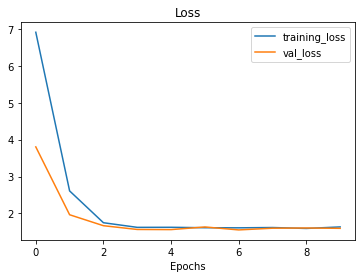

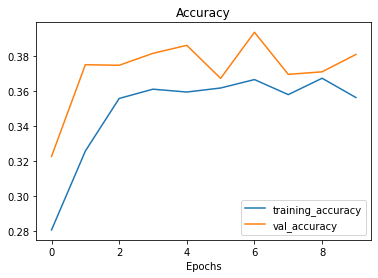

In [ ]:
plot_loss_curves(history01)

VGG16

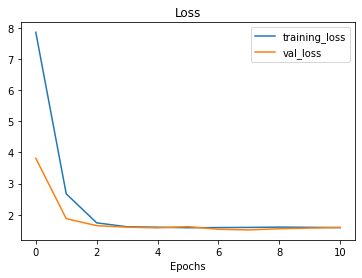

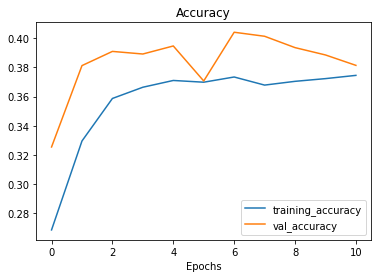

In [ ]:
plot_loss_curves(history02)

MobileNet

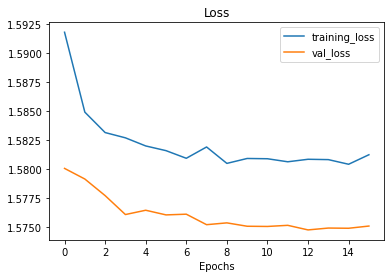

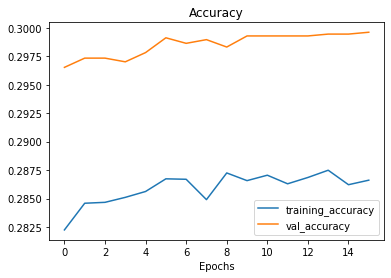

In [ ]:
plot_loss_curves(history03)

MobileNetV2

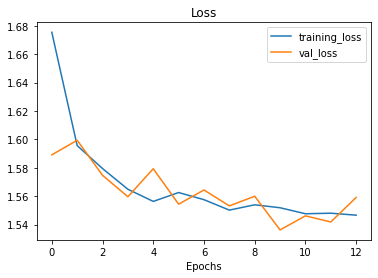

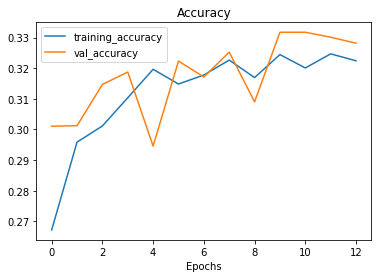

In [ ]:
plot_loss_curves(history04)

ResNet50

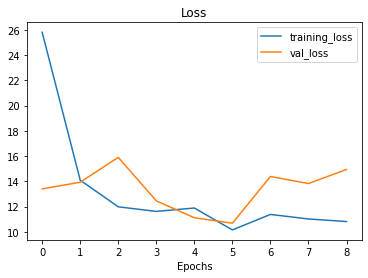

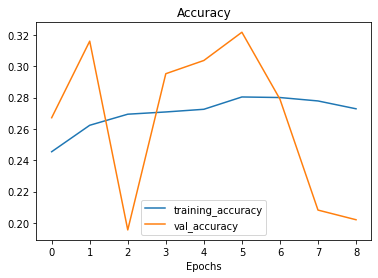

In [ ]:
plot_loss_curves(history05)

ResNet50V2

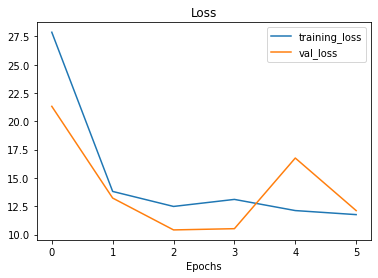

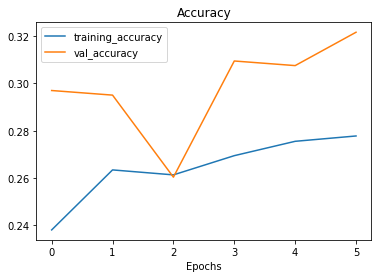

In [ ]:
plot_loss_curves(history07)

DenseNet121

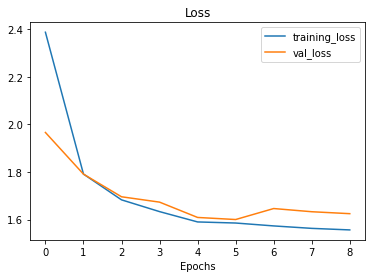

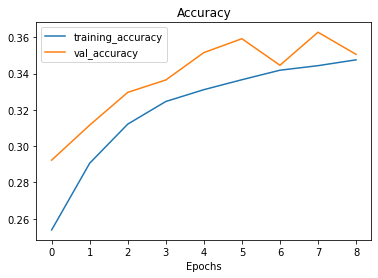

In [ ]:
plot_loss_curves(history08)

DenseNet169

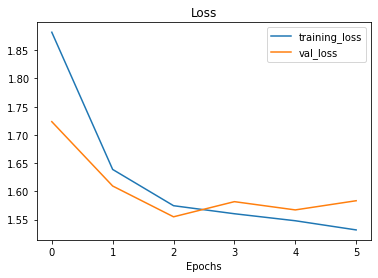

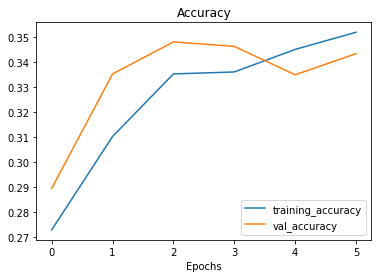

In [ ]:
plot_loss_curves(history09)